In [1]:
# we are using this to avoid any warning 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

In [4]:
import os

In [5]:
# reading the files from give path of folder 
folder_path = '/Users/jithin/Downloads/Assessment Data-20251118'
file_list = os.listdir(folder_path)

In [6]:
all_data = []
for file in file_list:
    if file.endswith("_data.csv"):
        city_name = file.replace("_data.csv", "")
        df = pd.read_csv(os.path.join(folder_path, file))
        df["City"] = city_name
        all_data.append(df)

In [7]:
# merging all cities files in to one thing loading it to dataframe df 
os.makedirs("data", exist_ok=True)
df = pd.concat(all_data, ignore_index=True)
df.to_csv("data/merged_data.csv", index=False)

In [8]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Brajrajnagar,07/12/2017,171.38,311.68,NaN,41.07,NaN,7.78,3.26,5.83,4.69,0.0,NaN,NaN,NaN,NaN
1,Brajrajnagar,08/12/2017,126.67,192.81,NaN,20.16,NaN,7.97,2.94,5.43,10.51,0.0,NaN,NaN,304.0,Very Poor
2,Brajrajnagar,09/12/2017,105.11,154.39,NaN,18.40,NaN,8.15,2.83,5.10,10.33,0.0,NaN,NaN,291.0,Poor
3,Brajrajnagar,10/12/2017,65.25,99.73,NaN,15.21,NaN,7.90,2.74,4.75,8.37,0.0,NaN,NaN,189.0,Moderate
4,Brajrajnagar,11/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Strip whitespace and fix inconsistent names
df["City"] = df["City"].str.strip()
df["City"] = df["City"].replace({"Braj rajnagar": "Brajrajnagar"})


In [10]:
df.City.unique() # finding unique cities in the dataframe 

array(['Brajrajnagar', 'Thiruvananthapuram', 'Amritsar', 'Patna',
       'Hyderabad', 'Mumbai', 'Amaravati', 'Bengaluru', 'Kochi', 'Aizawl',
       'Jorapokhar', 'Guwahati', 'Bhopal', 'Chandigarh', 'Ernakulam',
       'Kolkata', 'Talcher', 'Gurugram', 'Lucknow', 'Jaipur', 'Ahmedabad',
       'Visakhapatnam', 'Delhi', 'Chennai', 'Coimbatore', 'Shillong'],
      dtype=object)

In [11]:
len(df["City"].unique())

26

In [12]:
city_counts = df["City"].value_counts()
print(city_counts)

City
Delhi                 2009
Mumbai                2009
Lucknow               2009
Bengaluru             2009
Chennai               2009
Ahmedabad             2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


- Imported and merged 26 city CSVs into one DataFrame.

- Verified dataset shape (29,531 rows × 16 columns).

- Cleaned city names to ensure consistency.

- Confirmed 26 unique cities.

- Saved merged dataset to data/merged_data.csv for reproducibility.

In [14]:
df.shape

(29531, 16)

In [15]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


- The dataset contains 29,531 rows and 16 columns across 26 cities (2015–2020). Most pollutants are float values, AQI_Bucket is categorical. Missingness is highest in VOCs (Xylene 61%).

In [16]:
print("Date range:", df["Date"].min(), "to", df["Date"].max())

Date range: 01/01/2015 to 31/12/2019


In [17]:
# Count missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

# Show top 10 missing columns
missing_df = pd.DataFrame({"Missing": missing, "Percent": missing_percent})
missing_df.sort_values(by="Percent", ascending=False).head(10)


,Missing,Percent
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [18]:
# Remove duplicates
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()

# Check data types
df.dtypes


Duplicates before: 0


City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [19]:
# Convert Date column
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Create new columns
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["DayOfWeek"] = df["Date"].dt.dayofweek


In [20]:

num_cols = df.select_dtypes(include=["float64", "int64"]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


- Median imputation was chosen for numeric variables to reduce skew from extreme outliers. 
- Mode imputation was used for categorical AQI_Bucket to preserve class balance.

In [21]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month,Day,DayOfWeek
count,11590,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,2018-05-12 20:28:17.187230208,64.510857,109.659366,16.642601,27.726576,31.063568,20.813789,2.153872,13.830897,33.994121,2.859874,7.140485,1.788420,158.781552,2017.957299,6.193627,6.097999,2.998747
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,2015.000000,1.000000,1.000000,0.000000
25%,2017-03-11 00:00:00,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,0.980000,88.000000,2018.000000,6.000000,6.000000,3.000000
50%,2018-08-02 00:00:00,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,2018.000000,6.000000,6.000000,3.000000
75%,2019-08-09 00:00:00,72.450000,111.880000,17.570000,34.665000,36.015000,21.755000,1.380000,13.810000,42.730000,2.420000,6.020000,0.980000,179.000000,2018.000000,6.000000,6.000000,3.000000
max,2020-12-06 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,2020.000000,12.000000,12.000000,6.000000
std,NaN,59.807551,72.324020,21.506064,23.050531,29.477748,21.028862,6.724660,17.005647,20.202304,14.252822,17.224737,4.062039,130.272413,0.963632,2.179942,2.152156,1.256004


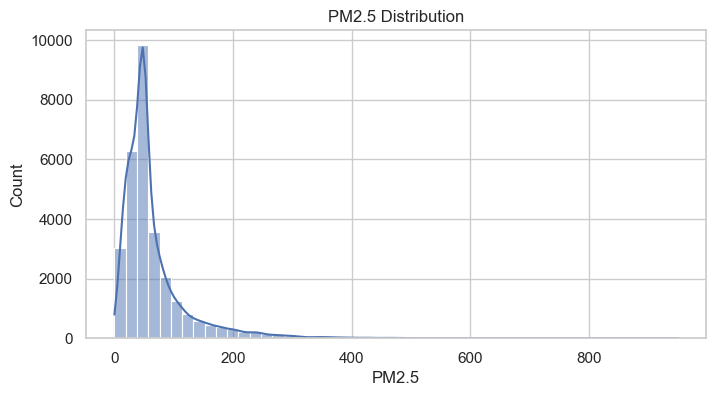

In [22]:
# Histogram for PM2.5
plt.figure(figsize=(8,4))
sns.histplot(df["PM2.5"], bins=50, kde=True)
plt.title("PM2.5 Distribution")
plt.show()

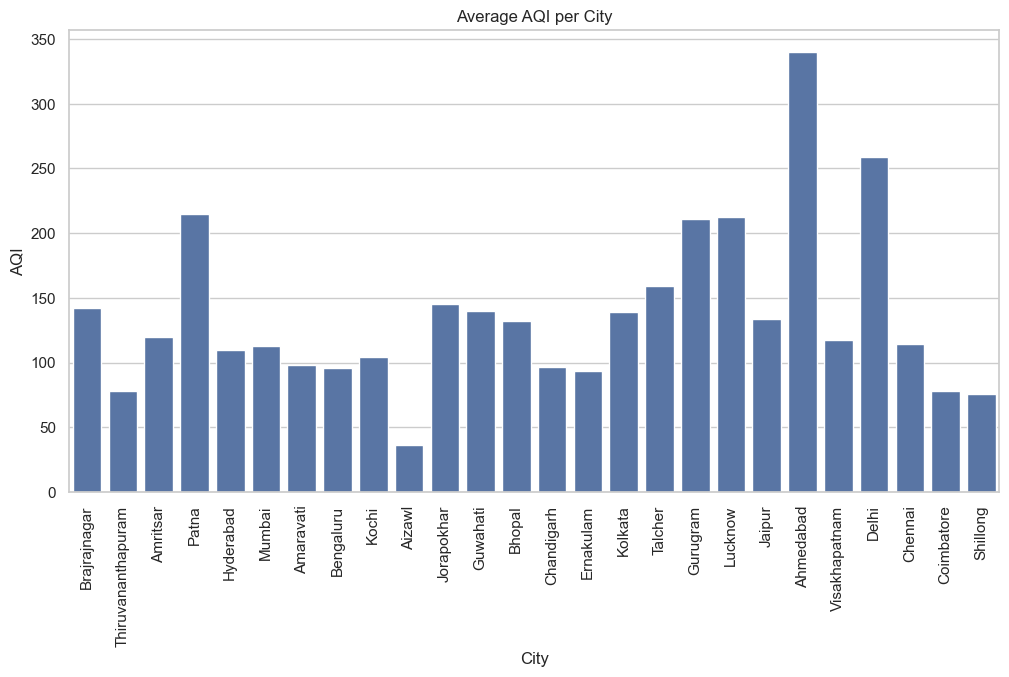

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x="City", y="AQI", data=df, ci=None)
plt.xticks(rotation=90)
plt.title("Average AQI per City")
plt.show()


In [24]:
monthly_avg = df.groupby("Month")["PM2.5"].mean()
monthly_avg = df.dropna(subset=["Month"]).groupby("Month")["PM2.5"].mean()

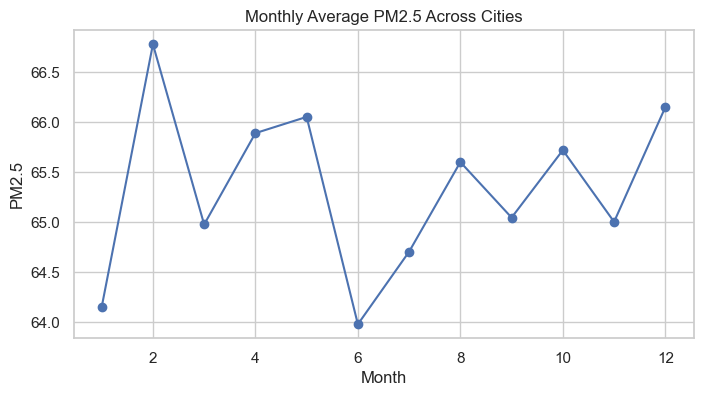

In [25]:
monthly_avg = df.groupby("Month")["PM2.5"].mean()
monthly_avg.plot(kind="line", marker="o", figsize=(8,4))
plt.title("Monthly Average PM2.5 Across Cities")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()

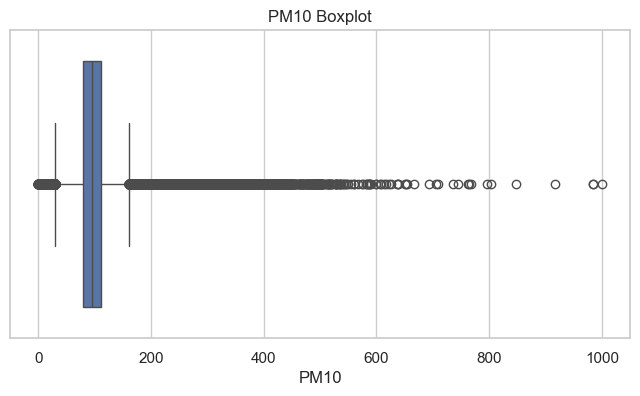

In [26]:
# Boxplot for PM10
plt.figure(figsize=(8,4))
sns.boxplot(x=df["PM10"])
plt.title("PM10 Boxplot")
plt.show()


- We use boxplot to check weather it has outliers or not 

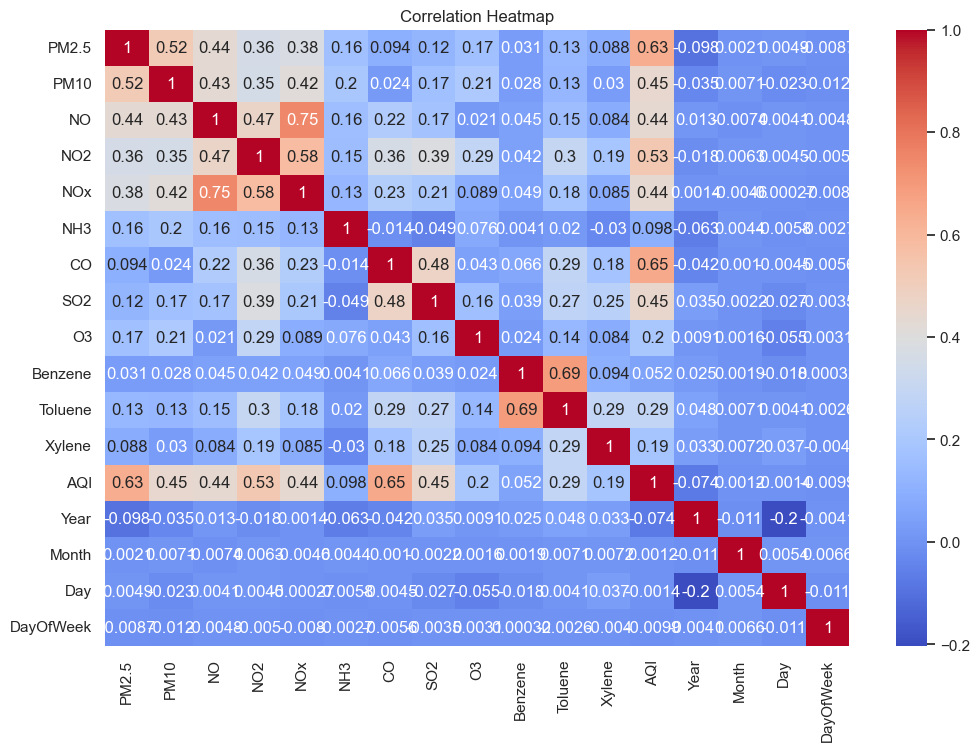

In [27]:
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights
- PM2.5 and PM10 show strong positive correlation, indicating they often rise together.
- AQI is highly correlated with PM2.5 and PM10, confirming their impact on air quality.
- NO2 and NOx also show strong correlation, as expected from their chemical relationship.
- VOCs like Benzene and Toluene show moderate correlation with AQI, suggesting urban pollution sources.


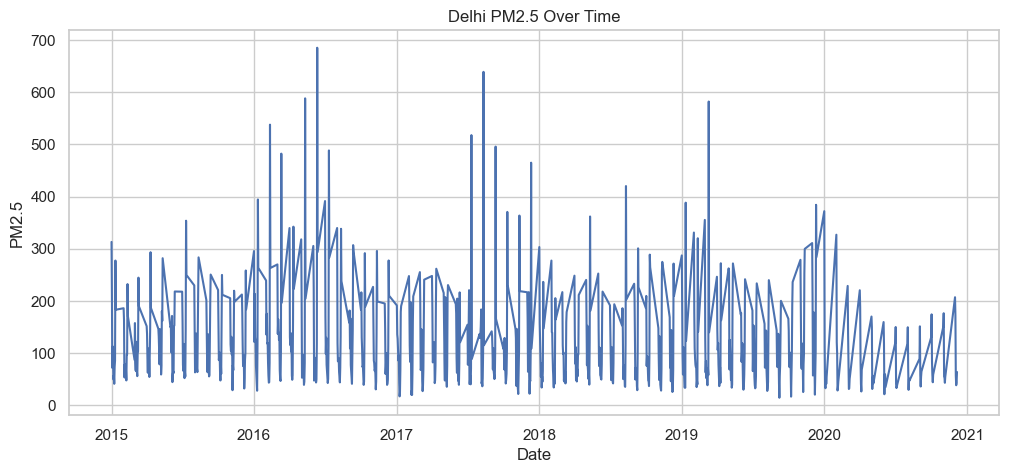

In [28]:
# Line plot for one city
city_df = df[df["City"] == "Delhi"]

plt.figure(figsize=(12,5))
sns.lineplot(x=city_df["Date"], y=city_df["PM2.5"])
plt.title("Delhi PM2.5 Over Time")
plt.show()


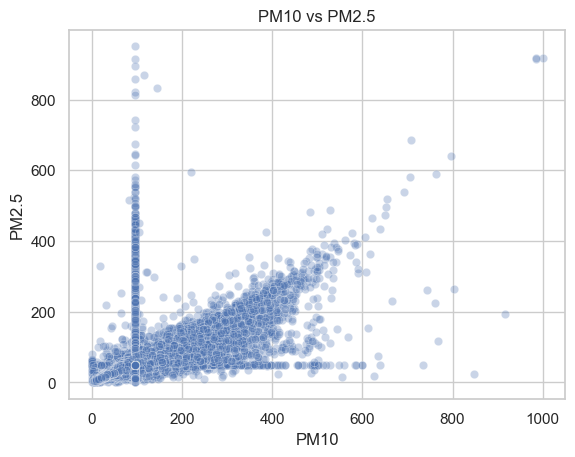

In [29]:
sns.scatterplot(x="PM10", y="PM2.5", data=df, alpha=0.3)
plt.title("PM10 vs PM2.5")
plt.show()

- The scatter plot shows a positive relationship between PM10 and PM2.5 levels.

- As PM10 increases, the values of PM2.5 also tend to increase.

- Most points are concentrated in the lower-to-mid range, indicating common pollution levels.

- A few outliers exist at high PM10 values, showing possible extreme pollution events.

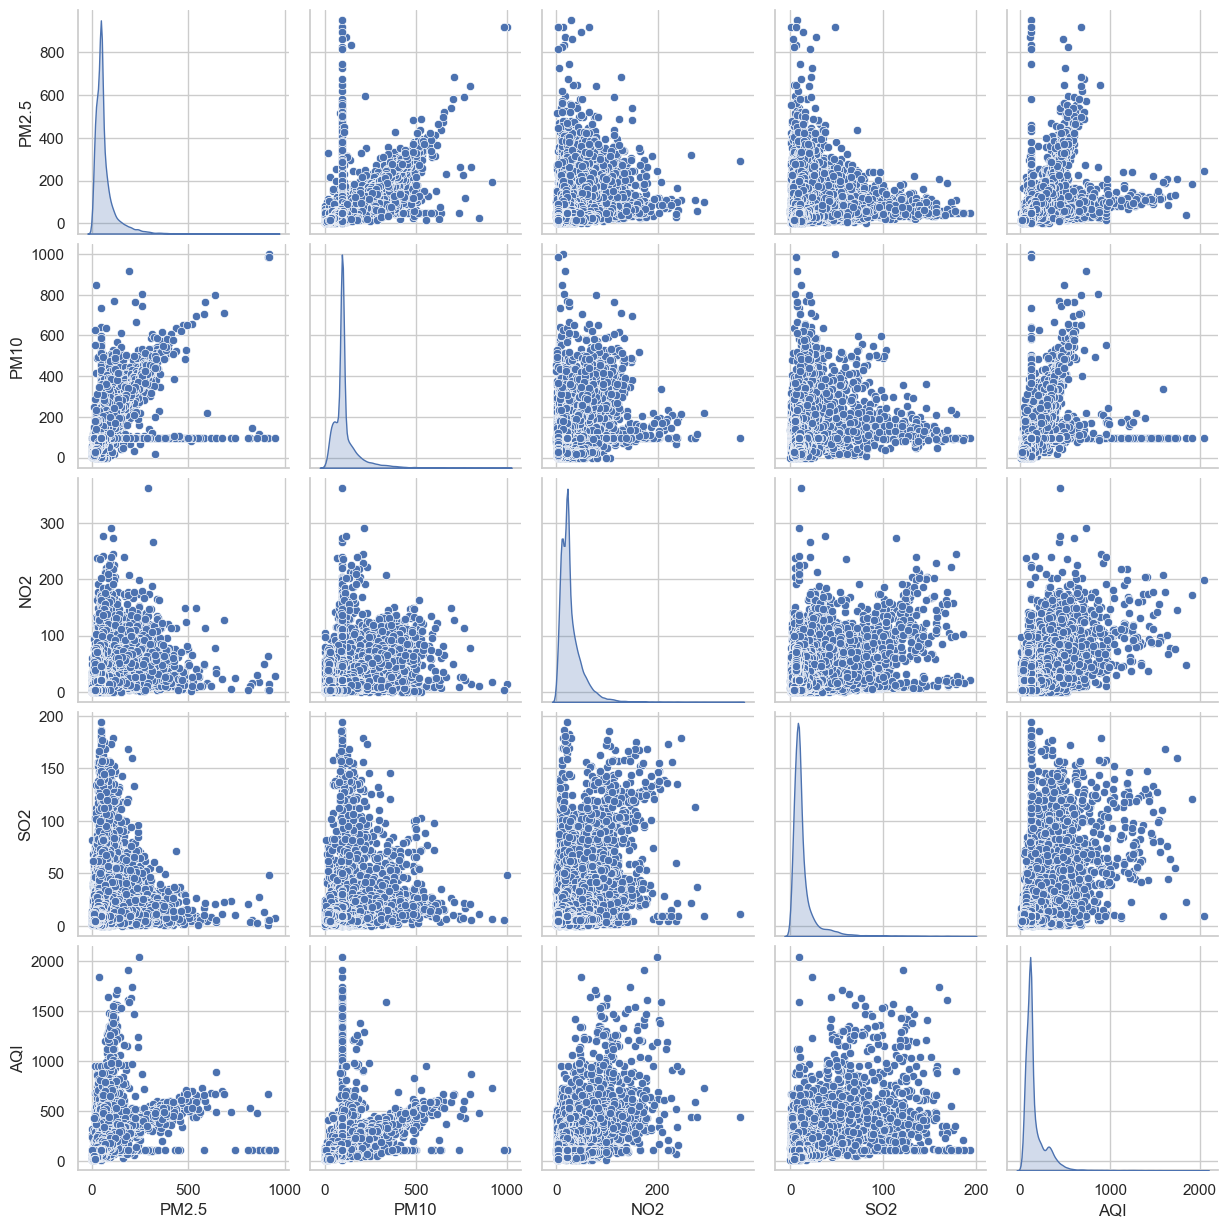

<Figure size 400x1000 with 0 Axes>

In [30]:
sns.pairplot(df[["PM2.5", "PM10", "NO2", "SO2", "AQI"]], diag_kind="kde")
plt.figure(figsize=(4,10))
plt.show()

- The plot shows relationships between key air quality indicators: PM2.5, PM10, NO2, SO2, and AQI.

- PM2.5 and PM10 show a strong positive correlation, meaning both tend to increase together.

- Most variables show right-skewed distributions, indicating many low values and fewer extreme high values.

- AQI appears strongly influenced by PM2.5 and PM10, visible from dense upward patterns.

- NO2 and SO2 show weaker correlations with PM values compared to AQI.

In [31]:
# Drop columns not needed
df_model = df.drop(columns=["Date", "AQI_Bucket"])

# Drop rows with missing target
df_model = df_model.dropna(subset=["PM2.5"])

# Encode City
df_model = pd.get_dummies(df_model, columns=["City"], drop_first=True)


In [32]:
# we are dividing our dataset using traintestsplit for model training in to (80:20)
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=["PM2.5"])
y = df_model["PM2.5"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Linear Regression with scaling
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
lr_scaled_preds = lr_pipeline.predict(X_test)

# Random Forest 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Linear Regression (scaled pipeline)
lr_scaled_preds = lr_pipeline.predict(X_test)
print("Linear Regression (Scaled):")
print("MAE:", mean_absolute_error(y_test, lr_scaled_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_scaled_preds)))
print("R2 Score:", r2_score(y_test, lr_scaled_preds))

# Random Forest
rf_preds = rf.predict(X_test)
print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("R2 Score:", r2_score(y_test, rf_preds))


Linear Regression (Scaled):
MAE: 17.519188412701613
RMSE: 34.10517086225593
R2 Score: 0.6662721344586332

Random Forest:
MAE: 10.215868088708426
RMSE: 23.460384172162474
R2 Score: 0.8420854123276139


In [36]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Randomized Search
rf_tuned = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # number of random combinations
    cv=3,       # 3-fold cross validation
    random_state=42,
    n_jobs=-1   # use all cores
)

rf_tuned.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_tuned.best_params_)

# Predictions with tuned model
rf_tuned_preds = rf_tuned.predict(X_test)

# Metrics
print("\nRandom Forest (Tuned):")
print("MAE:", mean_absolute_error(y_test, rf_tuned_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_tuned_preds)))
print("R2 Score:", r2_score(y_test, rf_tuned_preds))


Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}

Random Forest (Tuned):
MAE: 10.375645209429587
RMSE: 23.24917403293186
R2 Score: 0.844915973428058


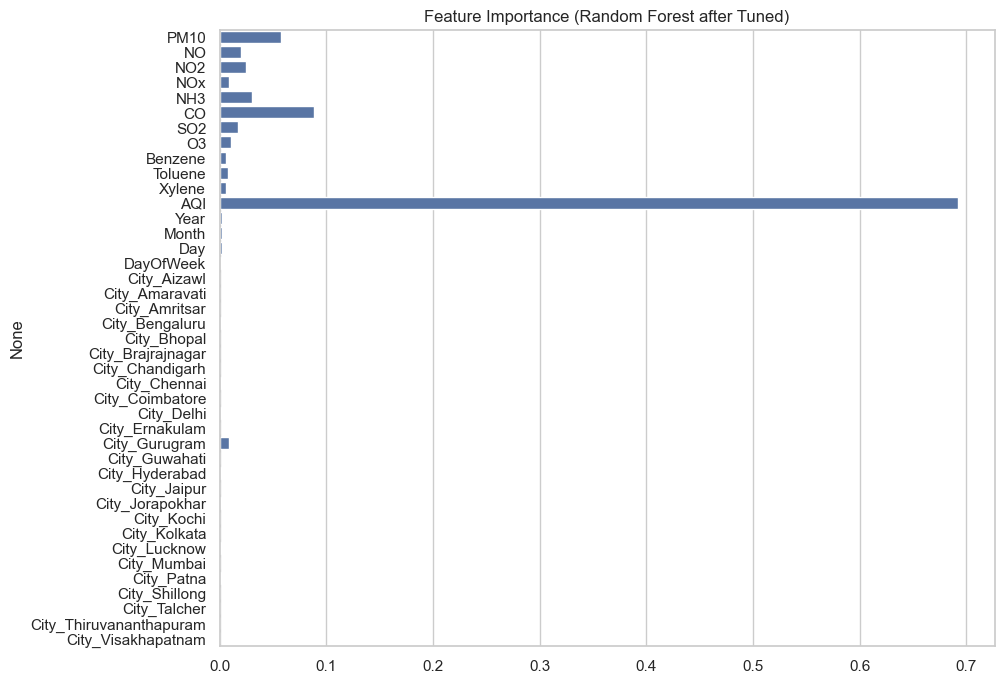

In [40]:
importances = rf_tuned.best_estimator_.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,8))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest after Tuned)")
plt.show()


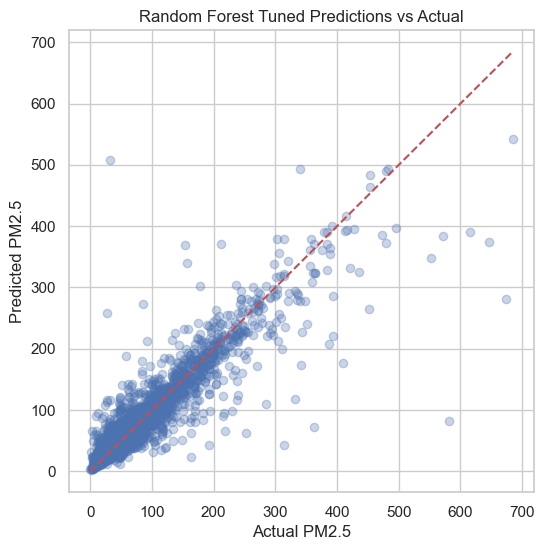

In [41]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_tuned_preds, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Random Forest Tuned Predictions vs Actual")
plt.show()


- Linear Regression (scaled) → R² ≈ 0.66, limited in capturing non‑linear pollutant interactions.

- Random Forest (default) → R² ≈ 0.842, better handling of complex relationships and outliers.

- Random Forest (tuned) → Best params: n_estimators=300, max_depth=20, min_samples_split=10, min_samples_leaf=1.

- Performance → R² ≈ 0.845, MAE ≈ 10.37, RMSE ≈ 23.25 (slight improvement over default).

- Feature importance → PM10, NO2, SO2 are strongest predictors of PM2.5.

- Predicted vs Actual → Tuned Random Forest closely tracks observed PM2.5 values.

- Conclusion → Random Forest tuned is the most reliable model for PM2.5 forecasting.

In [ ]:
# here we are importing the lib joblib and saving the model to use it for prediction in our fronend gui 
import joblib
os.makedirs("models", exist_ok=True)
joblib.dump(rf, "models/best_model.pkl")


In [ ]:
pip install streamlit


In [ ]:
import os

# Create folders in for GUI purpose 
os.makedirs("app/pages", exist_ok=True)
os.makedirs("models", exist_ok=True)
os.makedirs("data", exist_ok=True)

# Create empty files (optional placeholders)
open("app/main.py", "a").close()
open("app/pages/1_Data_Overview.py", "a").close()
open("app/pages/2_EDA.py", "a").close()
open("app/pages/3_Model_Prediction.py", "a").close()


In [ ]:
import os

# Check if 'models' folder exists
print("Models folder exists:", os.path.exists("models"))

# Check if 'app/pages' folder exists
print("App pages folder exists:", os.path.exists("app/pages"))


In [ ]:
# Should be written in main.py file after creation 
# app/main.py

import streamlit as st

st.set_page_config(page_title=" Air Quality App", layout="wide")

st.title(" Air Quality Analysis ")
st.write("Welcome Use the sidebar to explore the dataset, view EDA, and make predictions.")


In [ ]:
#selecting required features and saving the mode for using it for prediction
features = ["PM10", "NO2", "SO2", "CO", "Benzene", "Toluene"]
X = df[features]
y = df["PM2.5"]

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

import joblib
joblib.dump(model, "models/best_model.pkl")


In [ ]:
X_test # written this to check data and enter values to see if model predicted write or not 

In [ ]:
y_test